<a href="https://colab.research.google.com/github/AnnLivio/Cyclistic/blob/main/Cyclistic_Hypothesis_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CYCLISTIC · Hypothesis Test

**Cyclistic** es un programa de bicicletas compartidas que incluye 5,800 bicicletas y más de 600 estaciones en Chicago.
Uno de los enfoques que ayudó a hacer esto posible fue la flexibilidad de sus planes de precios: `pases de un solo viaje`, `pases de un día completo` y `membresías anuales`. A los clientes que compran pases de un solo viaje o pases de un día completo se los llama ciclistas ocasionales. Los clientes con membresías anuales se llaman miembros de Cyclistic.

### Pregunta inicial:
¿En qué se diferencian los socios anuales y los ciclistas ocasionales con respecto al uso de las bicicletas de Cyclistic?



## Cargar librerías y paquetes

In [ ]:
#import libraries
import pandas as pd
import numpy as np

import seaborn as sns
from scipy import stats


## Cargar datos para el análisis

In [ ]:
#Load the full dataset
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Capstone/data/cyclistic_clean_data.csv")


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5851552 entries, 0 to 5851551
Data columns (total 15 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
 13  ride_lenght         object 
 14  weekday             object 
dtypes: float64(4), object(11)
memory usage: 669.7+ MB


## Seleccionar columnas necesarias

In [ ]:
# Select column of interest
my_cols = ['rideable_type', 'start_station_name', 'end_station_name', 'member_casual', 'ride_lenght', 'weekday']
df = df[my_cols]
df.head()

,rideable_type,start_station_name,end_station_name,member_casual,ride_lenght,weekday
0,classic_bike,Orleans St & Chestnut St (NEXT Apts),Sheffield Ave & Webster Ave,member,0 days 00:12:53,Sunday
1,electric_bike,Desplaines St & Kinzie St,Sheffield Ave & Webster Ave,member,0 days 00:12:09,Wednesday
2,electric_bike,Orleans St & Chestnut St (NEXT Apts),Franklin St & Lake St,member,0 days 00:04:20,Thursday
3,classic_bike,Desplaines St & Kinzie St,Franklin St & Lake St,member,0 days 00:05:26,Tuesday
4,classic_bike,Desplaines St & Kinzie St,Franklin St & Lake St,member,0 days 00:11:30,Monday


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5851552 entries, 0 to 5851551
Data columns (total 6 columns):
 #   Column              Dtype 
---  ------              ----- 
 0   rideable_type       object
 1   start_station_name  object
 2   end_station_name    object
 3   member_casual       object
 4   ride_lenght         object
 5   weekday             object
dtypes: object(6)
memory usage: 267.9+ MB


## Convertir columnas al tipo correcto

`ride_lenght` a *timedelta* y creamos la columna `ride_in_seconds` para posteriores cálculos

In [ ]:
# Convert the 'ride_lenght' to timedelta
df['ride_lenght'] = pd.to_timedelta(df['ride_lenght'])

In [ ]:
# Create column ride_in_seconds
df['ride_in_seconds'] = df['ride_lenght'].dt.total_seconds()

In [ ]:
#Create list of weekday in order
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']


## Dividir dataset en 2 subsets: members y casual

In [ ]:
# Group data for members
df_members = df.query("member_casual == 'member'")

# Group data for casuals
df_casual = df.query("member_casual == 'casual'")

## Estadísticas para cada grupo

In [ ]:
stats_dict = {}
for i in ['members', 'casual']:
  # 1. Convert `started_at` and `ended_at` in datetime
  exec(f"median = df_{i}['ride_lenght'].median()")
  exec(f"max = df_{i}['ride_lenght'].max()")
  exec(f"min = df_{i}['ride_lenght'].min()")
  exec(f"mean = df_{i}['ride_lenght'].mean()")
  exec(f"std = df_{i}['ride_lenght'].std()")
  exec(f"count = df_{i}['ride_lenght'].count()")
  exec(f"mode = df_{i}['weekday'].mode()")
  exec(f"Q1 = df_{i}['ride_lenght'].quantile(0.25)")
  exec(f"Q3 = df_{i}['ride_lenght'].quantile(0.75)")

  stats_dict[i] = {'median': median, 'mean': mean, 'max': max, 'min': min, 'std':std, 'mode': mode[0], 'count':count, 'Q1':Q1, 'Q3':Q3}

stats_df = pd.DataFrame(stats_dict)
stats_df


,members,casual
median,0 days 00:08:40.467000,0 days 00:12:00
mean,0 days 00:12:49.850469939,0 days 00:25:08.303247889
max,1 days 01:59:48,1 days 01:59:56
min,0 days 00:00:00,0 days 00:00:00
std,0 days 00:37:21.164462338,0 days 01:30:05.247969503
mode,Wednesday,Saturday
count,3721797,2129755
Q1,0 days 00:05:05,0 days 00:06:39
Q3,0 days 00:14:46,0 days 00:22:37.929000


## Miembros de Cyclistic: viajes por día de la semana

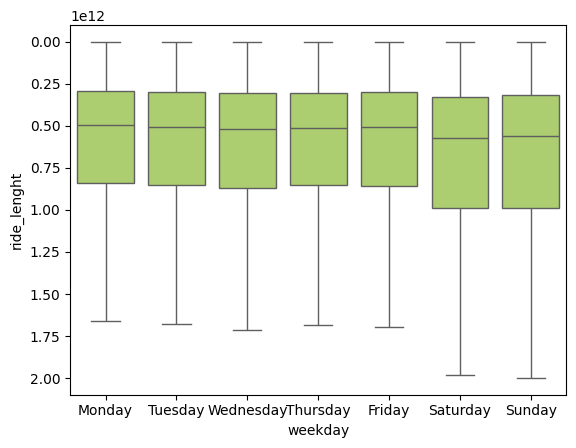

In [ ]:
sns.boxplot(x=df_members["weekday"],y=df_members["ride_lenght"], order=weekday_order, showfliers=False, color='#b0dd60');

## Ocasionales: viajes por día de la semana

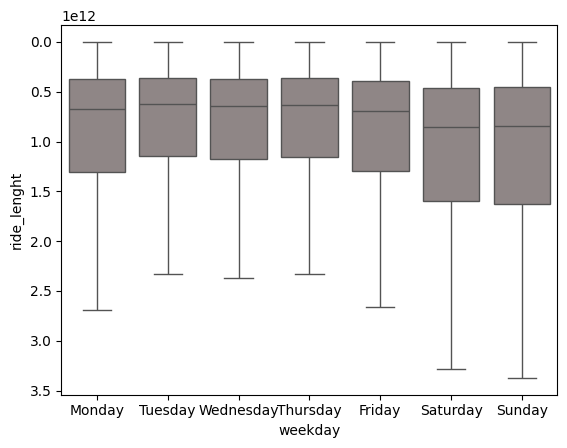

In [ ]:
sns.boxplot(x=df_casual["weekday"],y=df_casual["ride_lenght"], order=weekday_order, showfliers=False, color='#908585');

<Axes: xlabel='member_casual', ylabel='ride_in_seconds'>

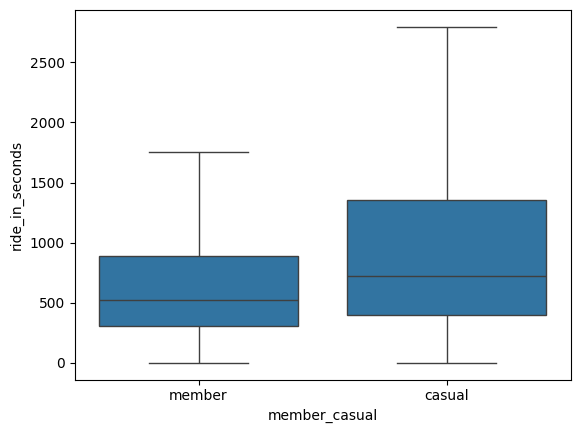

In [ ]:
sns.boxplot(x=df["member_casual"], y=df["ride_in_seconds"], showfliers=False)

## Test de Hipótesis

In [ ]:
sample_members = df_members.sample(n=1000, random_state=1234, replace=True)
sample_casual = df_casual.sample(n=1000, random_state=1320, replace=True)

## **Hipótesis 1 / Hypothesis 1**

$H_0$: No hay diferencia en el promedio de duración de los viajes entre miembros y ocasionales / There is no difference in average time of rides between member and casual users.

$H_A$: Hay diferencia en el promedio de duración de los viajes entre ambos grupos / There is a difference in average time of rides between member and casual users.

In [ ]:
# 3. Perform the t-test
tstats, pvalue = stats.ttest_ind(a=sample_members['ride_in_seconds'], b=sample_casual['ride_in_seconds'], equal_var=False)

if pvalue < 0.05:
  print("Reject the null hypothesis, p-value= ", pvalue)
else:
  print("Fail to reject the null hypothesis, p-value= ", pvalue)

Reject the null hypothesis, p-value=  3.611035480563914e-08



### **Hipótesis 2:**

$H_0$: The mean time of casual's rides is less or equal to AVG time of member's rides.

$H_A$: The mean time of casual's rides is greater than AVG time of member's rides.

In [ ]:
# 3. Perform the t-test
tstats, pvalue = stats.ttest_ind(a=sample_casual['ride_in_seconds'], b=sample_members['ride_in_seconds'], alternative='greater')

if pvalue < 0.05:
  print("Reject the null hypothesis, p-value= ", pvalue)
else:
  print("Fail to reject the null hypothesis, p-value= ", pvalue)

Reject the null hypothesis, p-value=  1.633468218200757e-08
